# Clasificacion
la clasificación es una subcategoría del aprendizaje supervisado en la que el objetivo es predecir las etiquetas de clase categóricas (discreta, valores no ordenados, pertenencia a grupo) de las nuevas instancias, basándonos en observaciones pasadas.
    
Clasificación Binaria: Es un tipo de clasificación en el que tan solo se pueden asignar dos clases diferentes (0 o 1). El ejemplo típico es la detección de email spam, en la que cada email es: spam → en cuyo caso será etiquetado con un 1 ; o no lo es → etiquetado con un 0.
    
    
Clasificación Multi-clase: Se pueden asignar múltiples categorías a las observaciones. Como el reconocimiento de caracteres de escritura manual de números (en el que las clases van de 0 a 9).

Existen diferentes algoritmos de clasificacion que estaremos utilizando a lo largo del proyecto

In [29]:
#Importamos las librerias que vamos a necesitar
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model 


In [30]:
#Traemos nuestro dataset y lo mostramos para ver que lo hemos hecho correctamente
diabetes = pd.read_csv('Datasets/Clasificacion/diabetes.csv')
diabetes.columns
diabetes.head()
#Y en donde cada columna representa
#Pregnacies:
    # Donde son los embarazos que ha tenido la persona hasta donde se hace la medida algo recurrente de esta enfermedad es
    # la diabetes durante o post parto aunque esta por lo general con los cuidados adecuados es temporal
#Glucose: 
    # Medida de los niveles de glucosa actuales de la persona esto normalmente se miden en milimoles por litro
#BloodPressure
    # Meidda de la presion en sangre en milímetros de mercurio cada uno equivalente a 13.332 kPa
#SkinThickness
    #Unidad de medida para ver el grosor de la piel en micrómetros equivale a: Una milésima de milímetro
#Insulin
    #Medida de la insulina encontrada en sangre del paciente en miligramos por decilitro
#BMI
    #Indice de masa corporal de la persona  peso [kg]/ estatura [m2]
#DiabetesPedigreeFunction
    #Esta es una funcion que utiliza historiales familiares para saber la predisposicion genetica de la persona a la diabetes
#Age
    #Edad del paciente
#Outcom
    #Es el resultado de la persona (1) significando que es un resultado positivo de diabetes y (0) negativo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Vemos las dimensiones de nuestro dataset
print("Dimensiones del  dataset : {}".format(diabetes.shape))

Dimensiones del  dataset : (768, 9)


In [28]:
#AHora ocn las medida que vamos a estar trabajando en esta clasificacion es con el resultado o con el outcome
#El cual como vimos donde es (0) es negativo y (1) positivo
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [5]:
#Vamos a hacer una limpieza rapido de los valores del dataset
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

print(diabetes_mod.shape)

(724, 9)


In [7]:
#Ahora selecconamos las columnas mas relevantes para este estudio sobre la diabetes siendo la cantidad de embarazos, 
# la glucos, el BMI y la predisposicion genetica lso mas impirtantes 
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [8]:
#Vamos esta utilizando la funcion de regresion linal ya que regresión lineal es el término técnico para dibujar una 
#línea recta a través de puntos de datos. Esto nos servira como base para la clasificacion que haremos
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

# Clasificacion test de prueba
Este método divide el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utiliza para entrenar al modelo. También podemos medir la precisión del modelo en el conjunto de entrenamiento, pero no debemos evaluar modelos basados solo en esta métrica.

El conjunto de prueba solo se usa para probar el modelo y evaluar la precisión después del entrenamiento. Las muestras de datos en el conjunto de prueba nunca se muestran al modelo durante el entrenamiento. La precisión en el conjunto de prueba proporciona una mejor indicación de cómo funcionarán los modelos con los nuevos datos.

    Pros: la división de tren / prueba sigue siendo útil debido a su flexibilidad y velocidad

    Contras: proporciona una estimación de alta varianza de la precisión fuera de la muestra

La biblioteca scikit-learn nos proporciona un método para dividir los datos en trenes y conjuntos de pruebas llamados train_test_split del módulo model_selection. Primero dividiremos los datos en trenes y conjuntos de pruebas. Luego usaremos el conjunto de trenes para entrenar el modelo de regresión logística. Luego predeciremos con el conjunto de prueba.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Finalmente, calculamos el rendimiento del modelo utilizando la métrica de evaluación Precisión de clasificación (que discutiremos en detalle en una próxima sección). Obtenemos un puntaje de precisión de 0.795 o 79.5%.

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy {}'.format(accuracy))

Accuracy 0.7955801104972375


# Validacion cruzada

Este método divide el conjunto de datos en K particiones iguales ("pliegues"), luego utiliza 1 pliegue como conjunto de prueba y la unión de los otros pliegues como conjunto de entrenamiento.

El proceso seguirá los pasos anteriores K veces, utilizando diferentes pliegues como la prueba establecida cada vez. La precisión promedio de las pruebas del proceso es la precisión de las pruebas.

     Pros: Estimación más precisa de la precisión fuera de la muestra. Uso más "eficiente" de los datos (cada observación se usa tanto para entrenamiento como para pruebas)

     Contras: Mucho más lento que la división Tren / Prueba.

Para la validación cruzada, Scikit Learn proporciona el método cross_val_score, que también es del módulo model_selection. Pasamos el modelo de regresión logística con las características X y las respuestas y como parámetros. Y el método realizará una validación cruzada 10 veces, utilizando la precisión de la clasificación como método de puntuación. Obtenemos una precisión media del 78%.

In [11]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy {}'.format(accuracy))

Accuracy 0.7790525114155251


# Matriz de confusion
Una matriz de confusión se puede definir libremente como una tabla que describe el rendimiento de un modelo de clasificación en un conjunto de datos de prueba para los que se conocen los valores verdaderos. Una matriz de confusión es altamente interpretativa y puede usarse para estimar una cantidad de otras métricas.

Scikit-learn proporciona un método para realizar la matriz de confusión en el conjunto de datos de prueba. El método confusion_matrix requiere los valores de la clase de respuesta real y los valores predichos para determinar la matriz.

In [12]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Dado que nuestro problema tiene solo dos clases de respuesta, se puede clasificar como un problema de clasificación binaria. Por lo tanto, la matriz de confusión es una cuadrícula de 2 X 2. La matriz de confusión se interpreta de manera diferente en diferentes implementaciones.

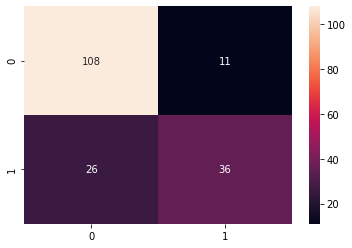

In [13]:
#La terminología básica relacionada con la matriz de confusión es la siguiente. Interpretaremos con respecto a nuestro problema.

     #Positivos verdaderos (TP): predicción correcta como diabético
     #Verdaderos negativos (TN): predicción correcta como no diabético
     #Positivos falsos (FP): predicción incorrecta como diabético ("error tipo I")
     #Falsos negativos (FN): predicción incorrecta como no diabético ("error tipo II")
sns.heatmap(confusion, annot=True,fmt="d")

# Métricas calculadas a partir de la matriz de confusión
Primero analizaremos la matriz de confusión obtenida en Verdaderos positivos (TP), Verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN).

In [14]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
#A partir de esto calcularemos las siguientes metricas

# Precision de clasificacion
La precisión de la clasificación es la relación entre las predicciones correctas y el no. de predicciones O más simplemente, con qué frecuencia es correcto el clasificador.
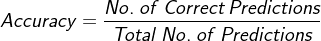


Podemos calcular la precisión utilizando la matriz de confusión. La siguiente es la ecuación para calcular la precisión utilizando la matriz de confusión:
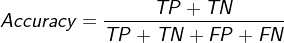

In [15]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))
#La precisión también se puede calcular utilizando el método precision_score.
#Podemos observar que la precisión es 0.795.

0.7955801104972375
0.7955801104972375


# Sensibilidad / recuperación

Sensibilidad o su recuperación es la relación de las predicciones positivas correctas a la no total. de predicciones positivas. O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se llama la tasa positiva verdadera.
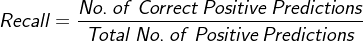

El uso de la recuperación de la matriz de confusión se puede calcular de la siguiente manera:
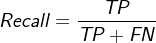

In [16]:
from sklearn.metrics import recall_score
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))
#Además, Scikit-learn proporciona un método llamado recall_score para encontrar el resultado
#de recuperación. Podemos observar que el clasificador tiene un puntaje de recuerdo de 0.58.

0.5806451612903226
0.5806451612903226


# Precisión
La precisión es la relación entre las predicciones correctas y el no. de predicciones predichas correctas. Esto mide cuán preciso es el clasificador al predecir instancias positivas.
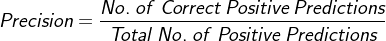

Esto se puede calcular a partir de la matriz de confusión de la siguiente manera:
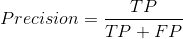


In [19]:
#Scikit -learn proporciona el método precision_score
#para calcular la precisión. Podemos observar que la precisión es 0.76.
from sklearn.metrics import precision_score
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106
